In [1]:
## check the performance of dataset and data_loader

In [4]:
import torch
import torchvision as tv
from torchvision import transforms
import torch.nn as nn
from matplotlib import pyplot as plt
from data_loader import get_loader 
import numpy as np
from matplotlib import pyplot as plt
from build_vocab import Vocabulary
import pickle
import os
import utils
import nltk

In [5]:
# define path
train_image_dir = '/datasets/COCO-2015/train2014'
dataset_image_val = 'val2014'
dataset_image_test = 'test2014'

train_caption_path = '/datasets/ee285f-public/COCO-Annotations/annotations_trainval2014/captions_train2014.json'
vocab_path = './vocab.pkl'

In [6]:
# Image preprocessing and normalization
transform = transforms.Compose([ 
    transforms.Resize((240, 240)),
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), 
                         (0.229, 0.224, 0.225))])

# Load vocabulary list
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)

batch_size = 128
num_workers = 1
# data loader for train and validation
train_data_loader = get_loader(train_image_dir, train_caption_path, vocab, 
                         transform, batch_size, shuffle=True, num_workers=num_workers)

loading annotations into memory...
Done (t=0.91s)
creating index...
index created!


In [7]:
def myimshow(image, ax=plt):
    image = image.to('cpu').numpy()
    image = np.moveaxis(image, [0, 1, 2], [2, 0, 1]) 
    image = (image + 1) / 2
    image[image < 0] = 0
    image[image > 1] = 1 
    h = ax.imshow(image) 
    ax.axis('off') 
    plt.show()
    return h

The index: [   1 8397   80 4694 3343 3482 4691 8397 4921  311 8397 1663 4694  670
 9667 8397 7433 4694 4882 3516   96    2]
<start> a plate of breakfast food on a table with a cup of coffee and a glass of orange juice . <end>


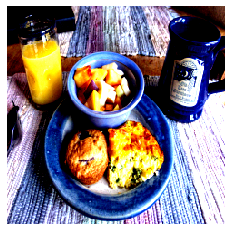

The index: [   1 3213 2721 3241 3601 2748 3749  506 9739 5731 9362 3213 3127 4694
 8397 6875 9850 1099 4691 8397  423 9186 6756 3213 9041   96    2]
<start> the skier balances himself as he makes his way over the knoll of a snow covered ridge on a sunny day at the mountain . <end>


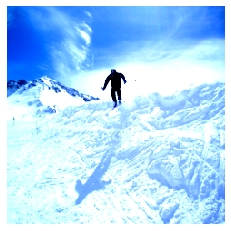

The index: [   1 8752 5425 6645 6533 4691 3213  330 4694 8397 5613 9667  236 4694
 3149 8216 8397 5290 7116 6856   96    2]
<start> three young boys playing on the sand of a beach and one of them holding a large disc toy . <end>


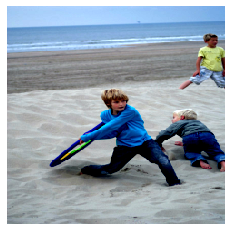

The index: [   1 8397 1383 1381  311 8397 2552 6376 6249  511 5282 8397 5055 6249
 9667 8397   80 4694 2552 6376 4834   96    2]
<start> a box filled with a chili cheese dog next to a relish dog and a plate of chili cheese fries . <end>


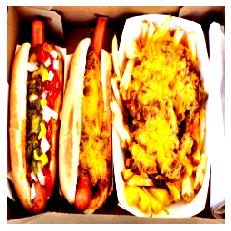

The index: [   1 8397 5613  311 8397 4723 3858 8397 4011 5992 6451 3213 9492 9667
 8397 6353 7945 8397 8619 6808 9739  187 8453 4335 4691 3213  330   96
    2]
<start> a beach with a woman in a black bikini facing the water and a man carrying a surfboard under his arm while walking on the sand . <end>


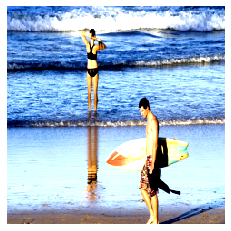

In [38]:
count = 0

for step, (images, captions, lengths) in enumerate(train_data_loader):
    print("The index: {}".format(captions[0].numpy()))    
    captionsInd = captions[0].numpy()
    
    # Convert word_ids to words
    sampled_caption = []
    for word_id in captionsInd:
        word = vocab.idx2word[word_id]
        sampled_caption.append(word)
        if word == '<end>':
            break
    sentence = ' '.join(sampled_caption)
    
    print(sentence)
    myimshow(images[0])
    
    count = count + 1
    
    if (count == 5):
        break